In [10]:
import scipy.stats
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [5]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [7]:
boston_df.describe(include = "all")

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [8]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

[Text(0, 0.5, 'Median value of owner-occupied homes'),
 Text(0.5, 0, 'Boxplot'),
 Text(0.5, 1.0, 'Boxplot for Median value of owner-occupied homes')]

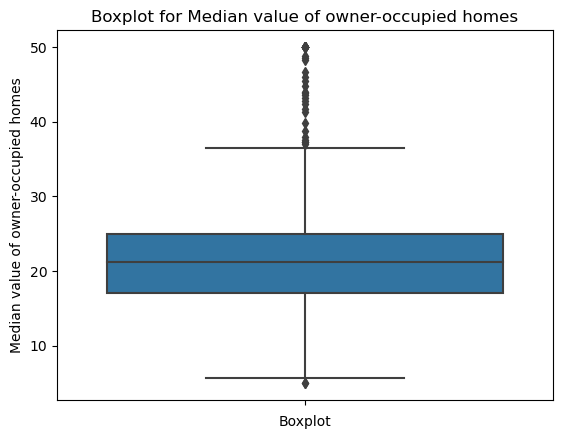

In [11]:
# Task 4: For the "Median value of owner-occupied homes" provide a boxplot

box = sns.boxplot(y = 'MEDV', data = boston_df)
box.set(ylabel = "Median value of owner-occupied homes"
        , xlabel = "Boxplot"
        , title = "Boxplot for Median value of owner-occupied homes")

[Text(0.5, 0, 'Charles River variable'),
 Text(0, 0.5, 'Frequency for Charles river variable'),
 Text(0.5, 1.0, 'Bar chart for the Charles river variable')]

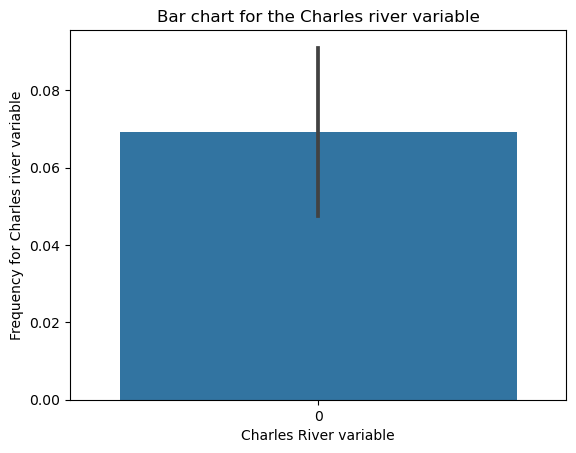

In [12]:
# Task 4: Provide a  bar plot for the Charles river variable

barplot = sns.barplot(boston_df['CHAS'])
barplot.set(xlabel = "Charles River variable"
             ,ylabel = "Frequency for Charles river variable"
            , title = "Bar chart for the Charles river variable")

[Text(0.5, 0, 'Proportion of owner-occupied units built prior to 1940'),
 Text(0, 0.5, "Median value of owner-occupied homes in $1000's"),
 Text(0.5, 1.0, 'Boxplot for the MEDV variable vs the AGE variable.')]

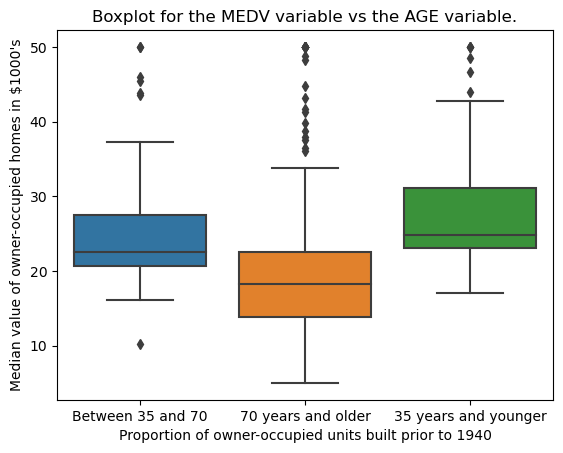

In [13]:
# Task 4: Provide a boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df.loc[boston_df['AGE'] <= 35, 'AGE_GROUP'] = "35 years and younger"
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_GROUP'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = "70 years and older"

boxplot = sns.boxplot(x = 'AGE_GROUP', y = 'MEDV', data = boston_df)
boxplot.set(xlabel = "Proportion of owner-occupied units built prior to 1940"
           , ylabel = "Median value of owner-occupied homes in $1000's"
           , title = "Boxplot for the MEDV variable vs the AGE variable.")

[Text(0, 0.5, 'Nitric Oxides concentration (parts per 10 million)'),
 Text(0.5, 0, 'Proportion of non-retail business acres per town.'),
 Text(0.5, 1.0, 'Scatter Plot between NOX and INDUS')]

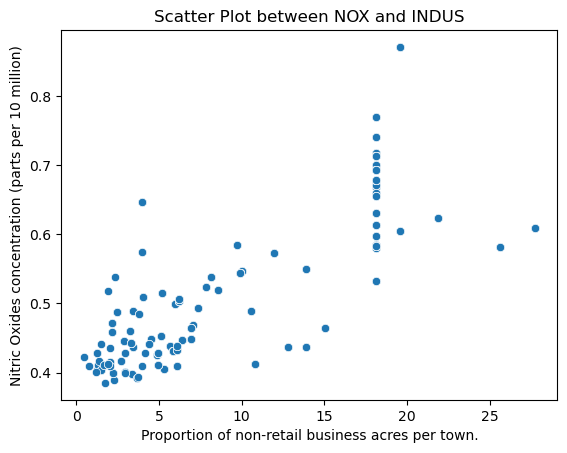

In [14]:
# Task 4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
# What can you say about the relationship?

# ScatterPlot for correlation between the INDUS and NOX column.

scatter = sns.scatterplot(x = 'INDUS', y = 'NOX', data = boston_df)
scatter.set(ylabel = "Nitric Oxides concentration (parts per 10 million)"
            , xlabel = "Proportion of non-retail business acres per town."
           , title = "Scatter Plot between NOX and INDUS")

The Scatter Plot shows that there is a high correlation between the Nitric Oxides concentration (parts per 10 million) and Proportion of non-retail business acres per town

C:\Users\papie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


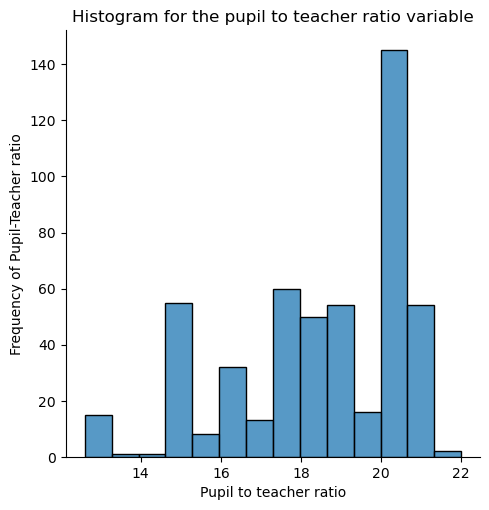

In [19]:
# Task 4: Create a histogram for the pupil to teacher ratio variable

histplot = sns.displot(boston_df['PTRATIO'])
histplot.set(xlabel = "Pupil to teacher ratio"
             , ylabel = "Frequency of Pupil-Teacher ratio"
            , title = "Histogram for the pupil to teacher ratio variable")

In [20]:
# Task 5: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

## H0:µ1=µ2
## H1:µ1≠µ2

scipy.stats.levene(boston_df['MEDV'], boston_df['CHAS'], center = 'mean')

LeveneResult(statistic=532.6811164157666, pvalue=5.402535119732986e-95)

In [21]:
scipy.stats.ttest_ind(boston_df['MEDV'], boston_df['CHAS'])

TtestResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305, df=1010.0)

P-value is less than alpha value 0.05 hence we reject the null hypothesis as there is enough proof that there is a statistical difference in in median value of houses bounded by the Charles river

In [23]:
# Task 5: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

## H0:µ1=µ2=µ3
## H1: At least one of the means differ

boston_df.loc[boston_df['AGE'] <= 30, 'AGE_GROUP'] = "35 years and younger"
boston_df.loc[(boston_df['AGE'] > 30) & (boston_df['AGE'] < 70), 'AGE_GROUP'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = "70 years and older"
scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == "35 years and younger"]['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == "Between 35 and 70"]['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == "70 years and older"]['MEDV'], 
                   center='mean')

LeveneResult(statistic=1.9263167703439634, pvalue=0.14675700390882251)

In [25]:
thirtyfive_lower = boston_df[boston_df['AGE_GROUP'] == "35 years and younger"]['MEDV']
thirtyfive_seventy = boston_df[boston_df['AGE_GROUP'] == "Between 35 and 70"]['MEDV']
seventy_older = boston_df[boston_df['AGE_GROUP'] == "70 years and older"]['MEDV']
scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)

F_onewayResult(statistic=34.249179272635395, pvalue=1.135217093487225e-14)

P-value is less than alpha value 0.05, hence we reject the null hypothesis as there is enough proof that there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

In [30]:
# Task 5: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

## H0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
## H1:There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

P-value is less than 0.05, hence we reject the null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [29]:
# Task 5: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

## H0:β1 = 0
## H1:β1 is not equal to 0 

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           1.21e-08
Time:                        18:13:02   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P-value is less than the alpha = 0.05, hence we reject the null hypothesis as there is evidence that there is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. The coefficient is positive 0.0572 so the impact increases by 0.0572 when there is an additional weighted distance to the five Boston employment centres